In [1]:
from __future__ import print_function, division   
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as linalg
import time
from numba import njit, prange
%matplotlib inline

# Our General Alg take 7 FLOPs

In [44]:
#General Algorithm!
def TriSolve(a,b,c,f,dim):
    u = np.zeros(dim)
    for i in range(1, dim):
        val = a[i]/b[i-1]
        b[i] -= val*c[i-1]
        f[i] -= val*f[i-1]
    u[-1] = f[-1]/b[-1]
    for i in range(dim-1,0,-1):
        u[i-1] = (f[i-1] - c[i-1]*u[i])/b[i-1]
    return u

def main(n):
    dim = n
    h = 1/dim
    a = -np.ones(dim)
    a[0] = 0
    b = 2*np.ones(dim)
    c = -np.ones(dim)
    c[-1] = 0    
    f = np.ones(dim)
    j = 0
    while j <= dim-1:
        f[j] = 100*np.exp(-10*j*h)*h**2
        j += 1

    start = time.perf_counter()   
    calculated = TriSolve(a,b,c,f,dim)
    end = time.perf_counter()
#     print(end - start)
    return calculated

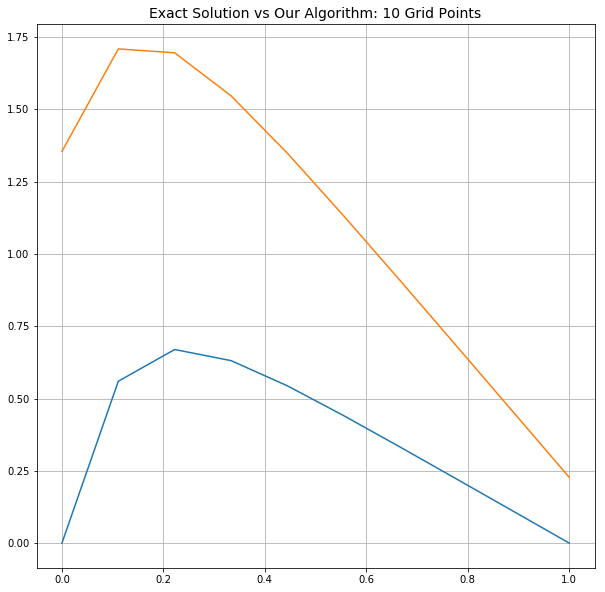

In [45]:
n = 10
x = np.linspace(0,1,n)
ans = 1 - (1 - np.exp(-10))*x - np.exp(-10*x)
plt.figure(figsize=(10,10))
plt.plot(x,ans,label='Exact')
plt.plot(x,main(n),label='Our Code')
plt.title('Exact Solution vs Our Algorithm: 10 Grid Points',fontsize = 14)
plt.grid()

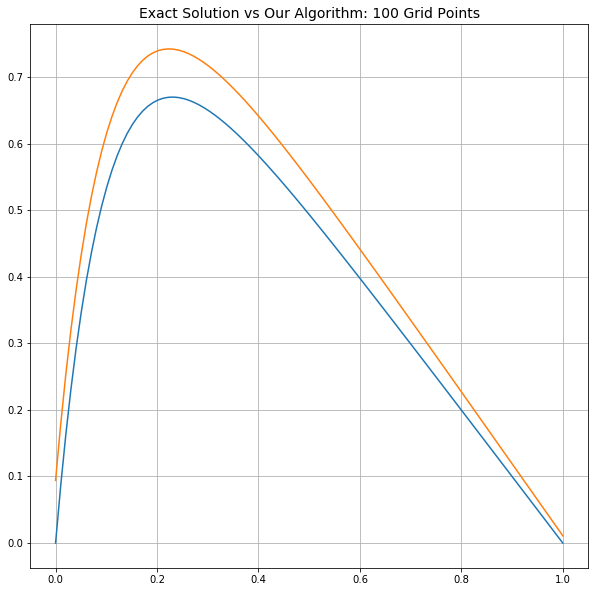

In [46]:
n = 100
x = np.linspace(0,1,n)
ans = 1 - (1 - np.exp(-10))*x - np.exp(-10*x)
plt.figure(figsize=(10,10))
plt.plot(x,ans,label='Exact')
plt.plot(x,main(n),label='Our Code')
plt.title('Exact Solution vs Our Algorithm: 100 Grid Points',fontsize = 14)
plt.grid()

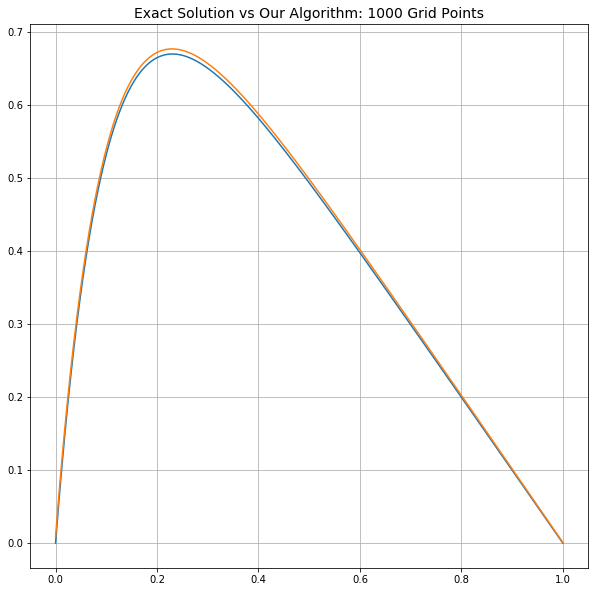

In [47]:
n = 1000
x = np.linspace(0,1,n)
ans = 1 - (1 - np.exp(-10))*x - np.exp(-10*x)
plt.figure(figsize=(10,10))
plt.plot(x,ans,label='Exact')
plt.plot(x,main(n),label='Our Code')
plt.title('Exact Solution vs Our Algorithm: 1000 Grid Points',fontsize = 14)
plt.grid()